# IMPORTING LIBRARIES


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [1]:
from IPython.display import Image
Image(url="https://housing.com/news/wp-content/uploads/2022/11/iris-flower-compressed.jpg")


# IMPORTING DATASET

In [3]:
!pip install numpy

In [5]:
df=pd.read_csv("D:\Oasis\Iris.csv")

# PERFORMING EDA

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
l=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
for i in l:
    print(df[i].unique())
    print("\n")

[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]


[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]


[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]


[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']




In [14]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# VISUALIZING OUR DATA

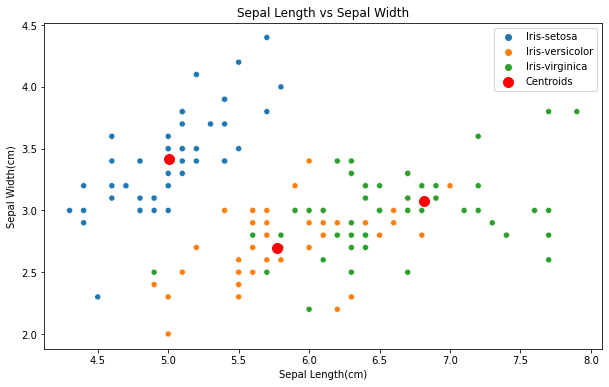

In [15]:
features=['SepalLengthCm','SepalWidthCm']
X=df[features]
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters)
df["Cluster"]=kmeans.fit_predict(X)
centroids=kmeans.cluster_centers_

plt.figure(figsize=(10,6))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=df)
plt.scatter(centroids[:,0],centroids[:,1],marker="o",s=100,color="red",label="Centroids")

plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.legend()
plt.show()


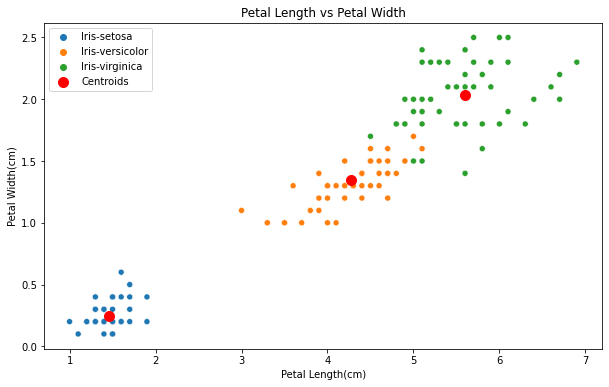

In [37]:
features=['PetalLengthCm','PetalWidthCm']
X=df[features]
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters)
df["Cluster"]=kmeans.fit_predict(X)
centroids=kmeans.cluster_centers_

plt.figure(figsize=(10,6))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=df)
plt.scatter(centroids[:,0],centroids[:,1],marker="o",s=100,color="red",label="Centroids")
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend()
plt.show()


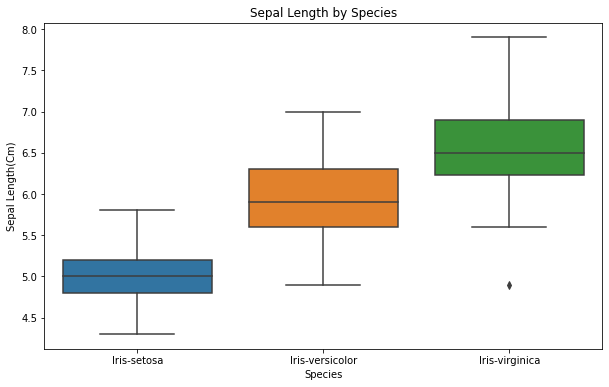

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.title("Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length(Cm)")
plt.show()

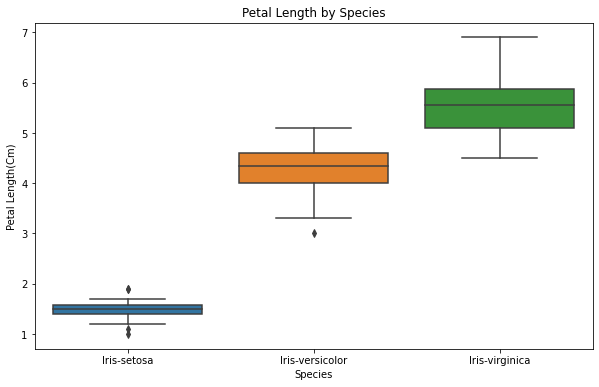

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.title("Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length(Cm)")
plt.show()

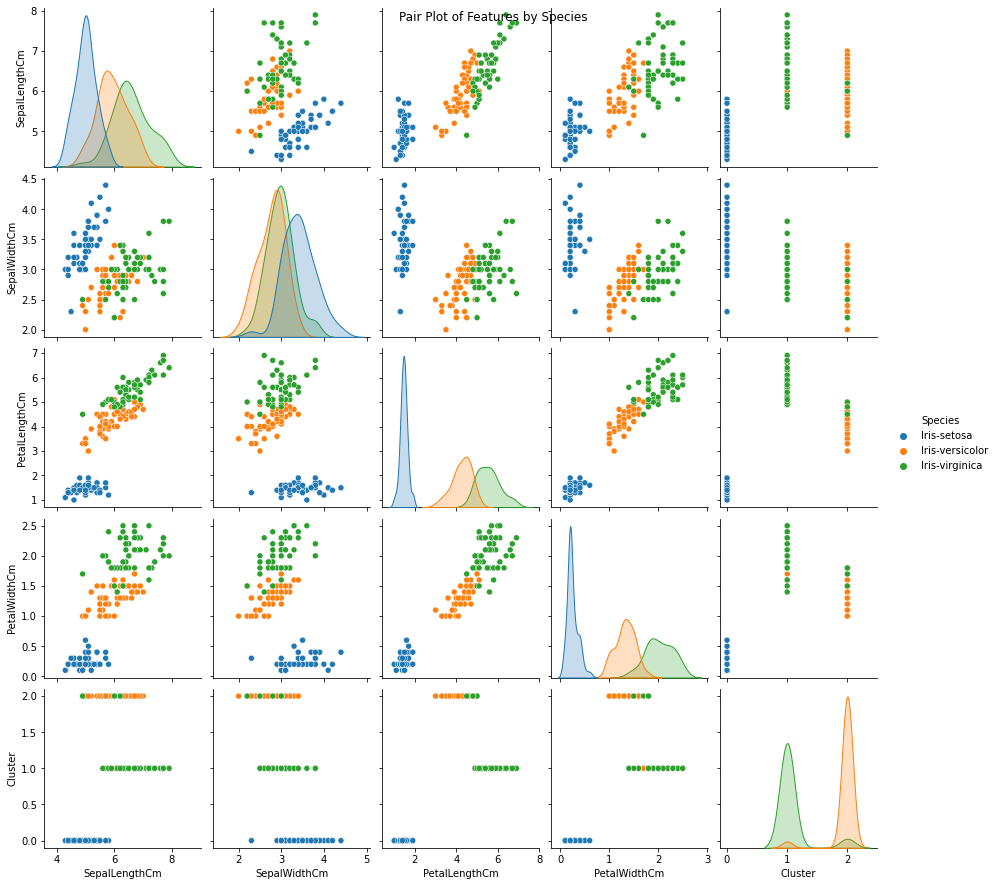

In [40]:
sns.pairplot(data=df,hue="Species")
plt.suptitle("Pair Plot of Features by Species")
plt.show()

# REMOVING OUTLIERS

In [41]:
df_no_outliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
24,4.8,3.4,1.9,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


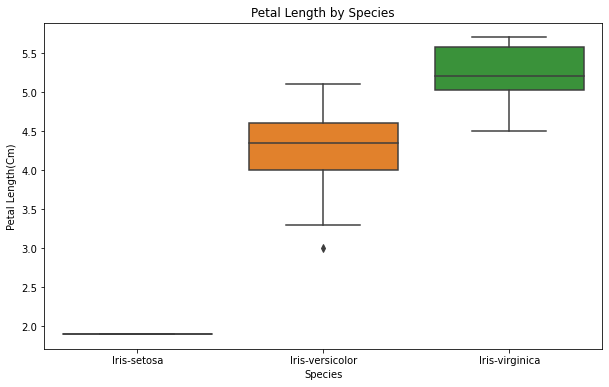

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Species",y="PetalLengthCm",data=df_no_outliers)
plt.title("Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length(Cm)")
plt.show()

In [44]:
df_no_outliers['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [45]:
x=df_no_outliers[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [46]:
y=df_no_outliers['Species']

In [47]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
24,4.8,3.4,1.9,0.2
44,5.1,3.8,1.9,0.4
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y

24     0
44     0
50     1
51     1
52     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 86, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
124,6.7,3.3,5.7,2.1
90,5.5,2.6,4.4,1.2
70,5.9,3.2,4.8,1.8
54,6.5,2.8,4.6,1.5
115,6.4,3.2,5.3,2.3
...,...,...,...,...
146,6.3,2.5,5.0,1.9
126,6.2,2.8,4.8,1.8
121,5.6,2.8,4.9,2.0
95,5.7,3.0,4.2,1.2


In [51]:
y_test

50     1
61     1
103    2
89     1
137    2
78     1
93     1
91     1
112    2
149    2
55     1
74     1
81     1
119    2
56     1
64     1
72     1
111    2
Name: Species, dtype: int64

In [53]:
model_params={
    'svm':{
        'model': svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

# ACCURACY OF MODEL

In [54]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.957143,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.884615,{'n_estimators': 10}
2,logistic_regression,0.898901,{'C': 1}


# CREATING SVM (Support Vector Machine) model

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model=SVC(kernel='linear',C=1.0)
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("ACcuracy:",accuracy)

ACcuracy: 1.0


In [56]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [57]:
y_train_pred=model.predict(x_train)

# TESTING ON CUSTOM DATA

In [58]:
setosa=[5.1,3.5,1.4,0.2]
virginica=[5.9,3.0,5.1,1.8]
versicolor=[5.2,2.7,3.9,1.4]
g=[6.7,3.1,4.7,1.5]
f=[6.3,3.3,6.0,2.5]

In [59]:
def pred(x):
    new_data=pd.DataFrame({'SepalLengthCm':[x[0]],'SepalWidthCm':[x[1]],'PetalLengthCm':[x[2]],'PetalWidthCm':[x[3]]})
    predicted_sales=int(model.predict(new_data))
    l=['Iris-setosa','Iris-versicolor','Iris-virginica']
    print(f"Predicted Species:{l[predicted_sales]}")

In [60]:
pred(setosa)

Predicted Species:Iris-setosa


In [61]:
pred(virginica)

Predicted Species:Iris-virginica


In [62]:
pred(versicolor)

Predicted Species:Iris-versicolor


In [63]:
pred(g)
pred(f)

Predicted Species:Iris-versicolor
Predicted Species:Iris-virginica
